In [50]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
# Define the file path
file_path = '../data/cleaned_data.csv'

# Load the cleaned data into a DataFrame
cleaned_df = pd.read_csv(file_path)

In [21]:
cleaned_df.info

<bound method DataFrame.info of            Bearer Id            Start  Start ms              End  End ms  \
0       1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
1       1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
2       1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   
3       7.277826e+18  4/15/2019 10:30      90.0   4/25/2019 6:14   775.0   
4       1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
...              ...              ...       ...              ...     ...   
146875  7.349883e+18   4/29/2019 7:28     794.0   4/30/2019 0:36   523.0   
146876  1.311448e+19   4/29/2019 7:28     114.0   4/30/2019 7:04   724.0   
146877  1.311448e+19   4/29/2019 7:28      79.0  4/30/2019 18:22   512.0   
146878  1.311448e+19   4/29/2019 7:28      83.0  4/30/2019 15:01   268.0   
146879  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   

        Dur. (ms)          IMSI  MSISDN/Number         

In [22]:
cleaned_df.shape

(146880, 47)

In [26]:
#top_10_handsets = cleaned_df['handset'].value_counts().head(10)
print(cleaned_df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',


Identifying the top 10 handsets used by the customers.

In [27]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Use value_counts to count the occurrences of each handset type and select the top 10
top_10_handset_types = cleaned_df['Handset Type'].value_counts().head(10)

# Display the top 10 handset types used by customers
top_10_handset_types


Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8818
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5150
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64

identify the top 3 handset manufacturers

In [28]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Extracting the manufacturer information from the 'Handset Type' column
cleaned_df['Manufacturer'] = cleaned_df['Handset Type'].str.split().str[0]

# Use value_counts to count the occurrences of each manufacturer and select the top 3
top_3_manufacturers = cleaned_df['Manufacturer'].value_counts().head(3)

# Display the top 3 handset manufacturers
print(top_3_manufacturers)


Manufacturer
Apple      59069
Samsung    39898
Huawei     33753
Name: count, dtype: int64


identify the top 5 handsets per top 3 handset manufacturer

In [29]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Extracting the manufacturer information from the 'Handset Type' column
cleaned_df['Manufacturer'] = cleaned_df['Handset Type'].str.split().str[0]

# Use value_counts to count the occurrences of each manufacturer and select the top 3
top_3_manufacturers = cleaned_df['Manufacturer'].value_counts().head(3)

# Iterate through the top 3 manufacturers and identify the top 5 handsets for each
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = cleaned_df[cleaned_df['Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_5_handsets)
    print("\n")


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9369
Apple iPhone 6 (A1586)     8967
Apple iPhone 7 (A1778)     6240
Apple iPhone Se (A1723)    5150
Apple iPhone 8 (A1905)     4961
Name: count, dtype: int64


Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4404
Samsung Galaxy A5 Sm-A520F      3672
Samsung Galaxy J5 (Sm-J530)     3663
Samsung Galaxy J3 (Sm-J330)     3431
Samsung Galaxy S7 (Sm-G930X)    3106
Name: count, dtype: int64


Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19373
Huawei E5180                       2062
Huawei P20 Lite Huawei Nova 3E     2000
Huawei P20                         1471
Huawei Y6 2018                      984
Name: count, dtype: int64




In [32]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

sessions_per_user = cleaned_df.groupby('MSISDN/Number')['Bearer Id'].count()

# Display the aggregated information
print(sessions_per_user)

MSISDN/Number
3.360304e+10      821
3.360304e+10        1
3.360304e+10        1
3.360304e+10        1
3.360304e+10        2
                ...  
3.370000e+10        1
3.370000e+10        1
3.370000e+10        1
3.370000e+10        1
3.373168e+10    22963
Name: Bearer Id, Length: 88752, dtype: int64


In [33]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Grouping the data by user and calculating the sum of session durations for each user
session_duration_per_user = cleaned_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Displaying the aggregated information
print(session_duration_per_user)


MSISDN/Number
3.360304e+10    7.768498e+07
3.360304e+10    1.459110e+05
3.360304e+10    9.824500e+04
3.360304e+10    8.635000e+04
3.360304e+10    1.721500e+05
                    ...     
3.370000e+10    1.716720e+05
3.370000e+10    9.498000e+03
3.370000e+10    6.604500e+04
3.370000e+10    2.142090e+05
3.373168e+10    2.336556e+09
Name: Dur. (ms), Length: 88752, dtype: float64


In [34]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Grouping the data by user and calculating the sum of download and upload data for each user
total_data_per_user = cleaned_df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Displaying the aggregated information
print(total_data_per_user)


               Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                    
3.360304e+10       3.775575e+11      3.362487e+10
3.360304e+10       6.589558e+08      3.237912e+07
3.360304e+10       4.956144e+08      4.515057e+07
3.360304e+10       2.514085e+08      2.822447e+07
3.360304e+10       1.109392e+09      6.782977e+07
...                         ...               ...
3.370000e+10       7.784317e+08      4.898112e+07
3.370000e+10       5.465595e+08      3.784142e+07
3.370000e+10       4.484382e+08      3.262826e+07
3.370000e+10       3.530826e+08      4.167086e+07
3.373168e+10       1.037532e+13      9.442734e+11

[88752 rows x 2 columns]


In [35]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# List of columns representing the data volume for each application
app_data_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                    'Other DL (Bytes)', 'Other UL (Bytes)']

# Grouping the data by user and application, and calculating the sum of the data volume for each application for each user
total_app_data_per_user = cleaned_df.groupby('MSISDN/Number')[app_data_columns].sum()

# Displaying the aggregated information
print(total_app_data_per_user)


               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360304e+10              1.477482e+09               26628331.0   
3.360304e+10              3.427019e+06                  50865.0   
3.360304e+10              2.068439e+06                  55217.0   
3.360304e+10              3.427047e+06                  53599.0   
3.360304e+10              6.266862e+06                  82218.0   
...                                ...                      ...   
3.370000e+10              1.469467e+06                  56077.0   
3.370000e+10              7.678990e+05                  19718.0   
3.370000e+10              1.248107e+06                  31209.0   
3.370000e+10              3.085870e+05                  34640.0   
3.373168e+10              4.129283e+10              755342615.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                          

Task 2.2 

In [36]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Compute basic metrics for numerical columns
basic_metrics = cleaned_df.describe()

# Display the computed basic metrics
print(basic_metrics)


          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.468800e+05  146880.000000  146880.000000  146880.000000   
mean   1.014444e+19     499.120384     498.655630  100180.691592   
std    2.892809e+18     288.559744     288.074935   58978.128901   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   58525.750000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  133148.250000   
max    1.318654e+19     999.000000     999.000000  245082.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.468800e+05   1.468800e+05  1.468800e+05    146880.000000   
mean   2.082015e+14   3.366906e+10  4.844200e+13        54.080848   
std    3.932505e+08   3.417226e+07  2.238851e+13        31.121623   
min    2.082008e+14   3.360304e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365128e+10  3.5460

In [37]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Compute dispersion parameters for each quantitative variable
dispersion_parameters = cleaned_df.describe().loc[['std', 'min', '25%', '50%', '75%', 'max']].T

# Display the computed dispersion parameters
print(dispersion_parameters)


                                         std           min           25%  \
Bearer Id                       2.892809e+18  6.917538e+18  7.349883e+18   
Start ms                        2.885597e+02  0.000000e+00  2.500000e+02   
End ms                          2.880749e+02  0.000000e+00  2.510000e+02   
Dur. (ms)                       5.897813e+04  7.142000e+03  5.852575e+04   
IMSI                            3.932505e+08  2.082008e+14  2.082014e+14   
MSISDN/Number                   3.417226e+07  3.360304e+10  3.365128e+10   
IMEI                            2.238851e+13  4.400152e+11  3.546071e+13   
Avg RTT DL (ms)                 3.112162e+01  0.000000e+00  3.100000e+01   
Avg RTT UL (ms)                 9.610441e+00  0.000000e+00  2.000000e+00   
Avg Bearer TP DL (kbps)         1.740672e+04  0.000000e+00  4.300000e+01   
Avg Bearer TP UL (kbps)         1.010565e+03  0.000000e+00  4.700000e+01   
TCP DL Retrans. Vol (Bytes)     2.838297e+06  2.000000e+00  2.364450e+04   
TCP UL Retra

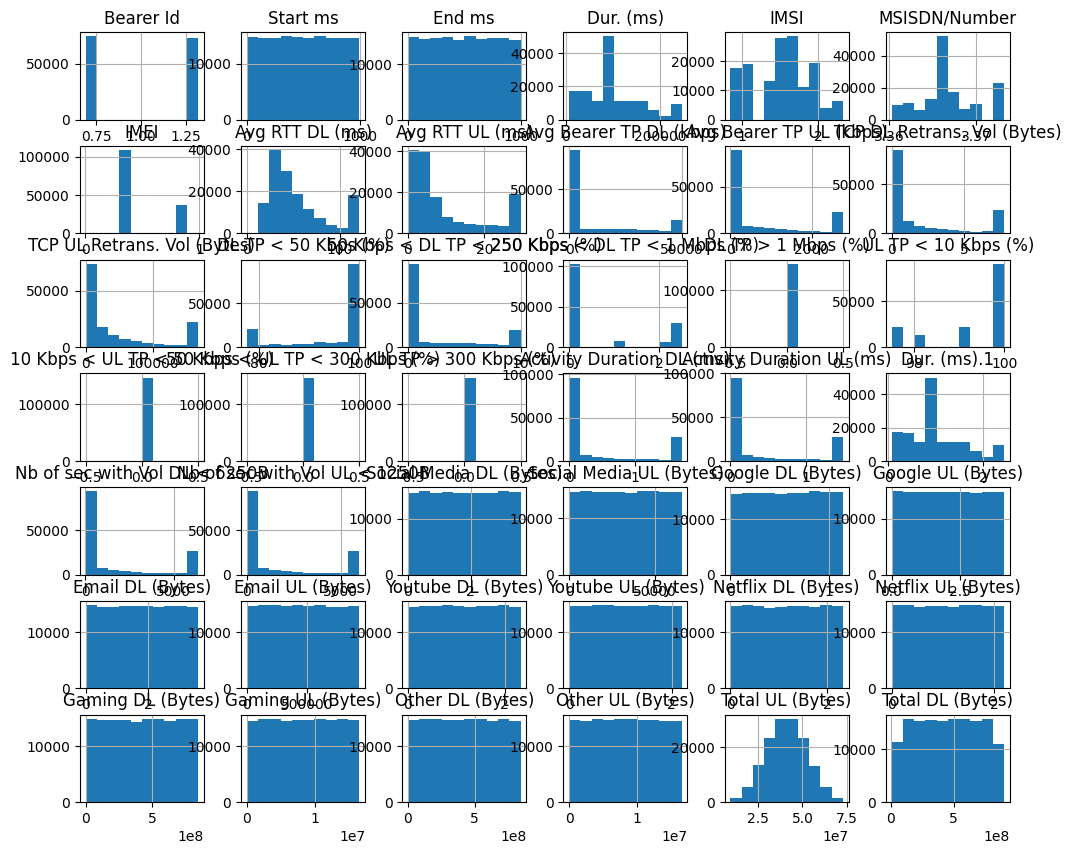

ValueError: Layout of 3x3 must be larger than required size 42

<Figure size 1200x1000 with 0 Axes>

In [39]:

# Assumingcleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Create histograms for quantitative variables
cleaned_df.hist(figsize=(12, 10))
plt.show()

# Create box plots for quantitative variables
cleaned_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10))
plt.show()


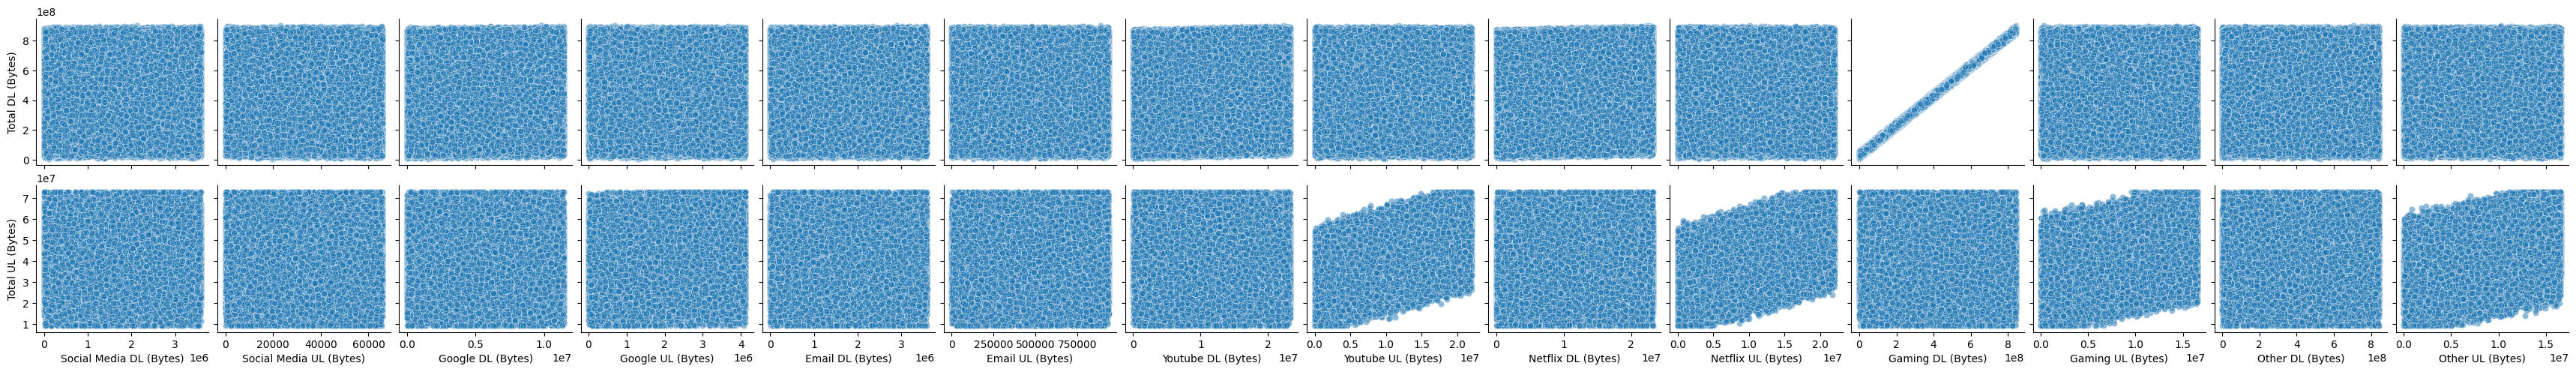

In [41]:
# Select the columns for each application and the total DL and UL data
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

total_data_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']

# Create pair plots to visualize the relationship between each application and the total DL and UL data
sns.pairplot(cleaned_df, x_vars=app_columns, y_vars=total_data_columns, kind='scatter', plot_kws={'alpha': 0.5})
plt.show()


In [46]:
# Step 1: Calculate the total duration for all sessions per user
total_duration_per_user = cleaned_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Step 2: Segment the users into decile classes based on the total duration
decile_classes = pd.qcut(total_duration_per_user, q=5, labels=False, duplicates='drop')

# Step 3: Compute the total data (DL+UL) per decile class
cleaned_df['Total Data (DL+UL)'] = cleaned_df['Total DL (Bytes)'] + cleaned_df['Total UL (Bytes)']
data_per_decile_class = cleaned_df.groupby(decile_classes)['Total Data (DL+UL)'].sum()

# Display the total data (DL+UL) per decile class
data_per_decile_class
decile_classes

MSISDN/Number
3.360304e+10    4
3.360304e+10    3
3.360304e+10    2
3.360304e+10    1
3.360304e+10    3
               ..
3.370000e+10    3
3.370000e+10    0
3.370000e+10    1
3.370000e+10    4
3.373168e+10    4
Name: Dur. (ms), Length: 88752, dtype: int64

In [47]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Select the specified variables
selected_variables = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)',
                      'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                      'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                      'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute the correlation matrix
correlation_matrix = cleaned_df[selected_variables].corr()

# Display the correlation matrix
print(correlation_matrix)


                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000236   
Social Media UL (Bytes)                -0.000236                 1.000000   
Google DL (Bytes)                      -0.002088                 0.003563   
Google UL (Bytes)                      -0.000116                 0.000374   
Email DL (Bytes)                        0.004970                 0.004482   
Email UL (Bytes)                       -0.002678                -0.001632   
Youtube DL (Bytes)                     -0.001494                -0.002160   
Youtube UL (Bytes)                      0.002515                -0.002227   
Netflix DL (Bytes)                     -0.001877                -0.001116   
Netflix UL (Bytes)                      0.004025                -0.002611   
Gaming DL (Bytes)                       0.001827                -0.000013   
Gaming UL (Bytes)                       0.003409                 0.001393   

In [51]:
# Assuming cleaned_df is your DataFrame containing the cleaned data
# Replace 'cleaned_df' with the actual name of your DataFrame

# Select the variables for PCA
selected_variables = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                      'Google DL (Bytes)', 'Google UL (Bytes)',
                      'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                      'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                      'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                      'Other DL (Bytes)', 'Other UL (Bytes)']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df[selected_variables])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Interpret the results
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


Explained variance ratio: [0.0725685  0.07242846 0.07211346 0.07199418 0.07178939 0.07165834
 0.07157803 0.07133461 0.07116549 0.0711165  0.07084424 0.07060203
 0.07053464 0.07027213]
